In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv(r'C:\Users\pride\Downloads\archive\Online Shop Customer Sales Data.csv')

In [16]:
df.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0


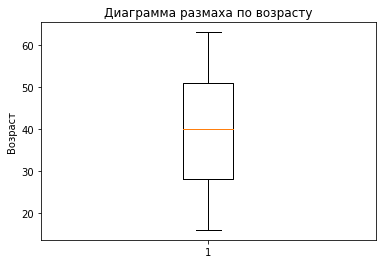

In [22]:
plt.boxplot(df['Age'])
plt.ylabel('Возраст')
plt.title('Диаграмма размаха по возрасту')
plt.show()

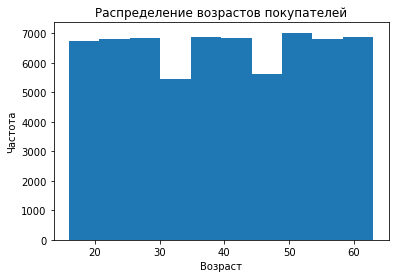

In [27]:
plt.hist(df['Age'], bins=10)
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Распределение возрастов покупателей')
plt.show()

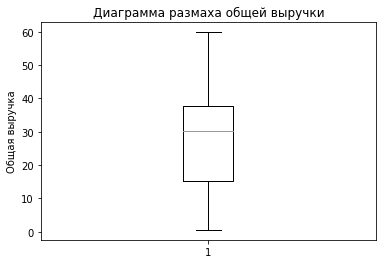

In [20]:
plt.boxplot(df['Revenue_Total'])
plt.ylabel('Общая выручка')
plt.title('Диаграмма размаха общей выручки')
plt.show()

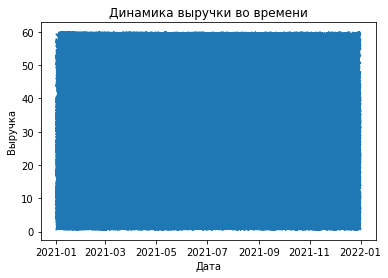

In [28]:
df['Purchase_DATE'] = pd.to_datetime(df['Purchase_DATE'], format='%d.%m.%y')

df.set_index('Purchase_DATE', inplace=True)

plt.plot(df['Revenue_Total'])
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Динамика выручки во времени')
plt.show()

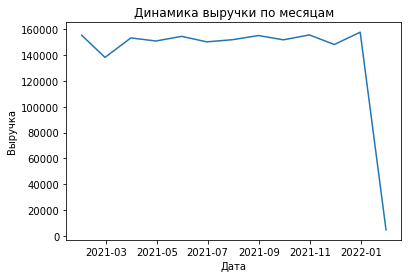

In [29]:
monthly_sales = df['Revenue_Total'].resample('M').sum()
# построить новый временной график по укрупненным данным
plt.plot(monthly_sales)
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Динамика выручки по месяцам')
plt.show()

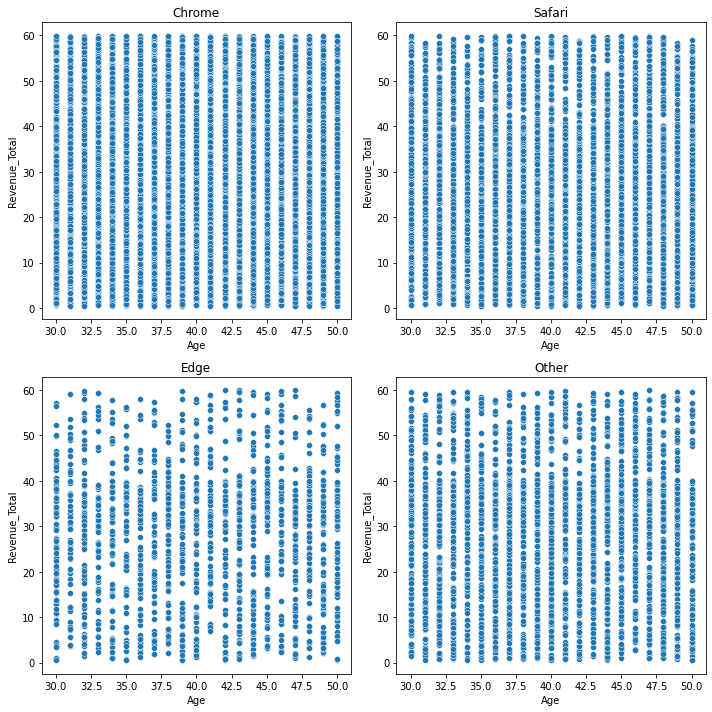

In [39]:
age_filtered_df = df[(df['Age'] >= 30) & (df['Age'] <= 50)]

chrome_df = age_filtered_df[age_filtered_df['Browser'] == 0]
safari_df = age_filtered_df[age_filtered_df['Browser'] == 1]
edge_df = age_filtered_df[age_filtered_df['Browser'] == 2]
other_df = age_filtered_df[age_filtered_df['Browser'] == 3]

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

sns.scatterplot(data=chrome_df, x='Age', y='Revenue_Total', ax=ax[0, 0])
sns.scatterplot(data=safari_df, x='Age', y='Revenue_Total', ax=ax[0, 1])
sns.scatterplot(data=edge_df, x='Age', y='Revenue_Total', ax=ax[1, 0])
sns.scatterplot(data=other_df, x='Age', y='Revenue_Total', ax=ax[1, 1])

ax[0, 0].set_title('Chrome')
ax[0, 1].set_title('Safari')
ax[1, 0].set_title('Edge')
ax[1, 1].set_title('Other')

plt.tight_layout()
plt.show()

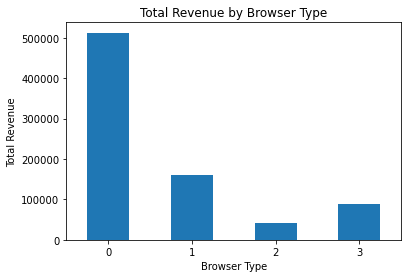

In [40]:
browser_revenue = df.groupby('Browser')['Revenue_Total'].sum()

browser_revenue.plot(kind='bar', rot=0)
plt.xlabel('Browser Type')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Browser Type')
plt.show()






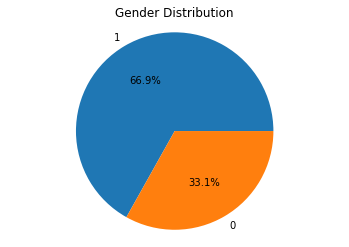

In [41]:
gender_counts = df['Gender'].value_counts()

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Gender Distribution')
plt.show()